In [1]:
import pandas as pd
import numpy as np
import pyreadr

# Data Processing Method:

- read in from analysis.rdata
- calculate PIB from pic per capita and population
- merge labor and social security rais data
- sort jobs and companies by service or industry (Check this with Kathryn, should we get rid of individual ones and also the ones in analysis.Rdata?, I have it by percentage to reduce overlap w population. is this ok?) **
- read in year_deforest data. there are some missing values that result in NAs ** Keep all of them 

- fill in 2016 emission data
- pull in Finbra data ** (change from 6 to 7 digit code, spend more time on this first then ask Kathryn abt NAs)

- legal amazon vs. all of brazil municipalities?
- include election data (incumbent won reelection variables etc., whether mayor has ties to agro)
- indicators and feature importance (https://stats.stackexchange.com/questions/314567/feature-importance-with-dummy-variables)
- grouped variable importance
- see what happens when we drop all but socio/politico variables

# Get Data

## Main Data

In [2]:
main = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/analysis.Rdata') #read R dataframe into Python
df1 = pd.DataFrame(main['forest_full'])
#df = df1.sample(50000) #trim because this frame is quite large, test that all runs before doing entire dataset!
#df = df1.sample(100000) #trim because this frame is quite large, test that all runs before doing entire dataset!


df = df1



In [3]:
df.shape

(2427898, 35)

In [4]:
df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,ironore,silver,copper,gold,soy_price,beef_price,ag_jobs,mining_jobs,public_jobs,construction_jobs
0,1100015,0.0,8436645,-62.825,-12.925,2002,97.0,85.50,21.81664,154.0,...,29.309999,147894.59375,1559.47998,9965846.0,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
1,1100015,16.0,8436646,-62.825,-12.875,2002,65.0,68.75,22.56391,146.0,...,29.309999,147894.59375,1559.47998,9965846.0,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
2,1100015,5.0,8440244,-62.775,-12.975,2002,92.0,87.75,21.30135,156.0,...,29.309999,147894.59375,1559.47998,9965846.0,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
3,1100015,9.0,8440245,-62.775,-12.925,2002,83.0,73.75,22.10585,156.0,...,29.309999,147894.59375,1559.47998,9965846.0,188.86617,95.403771,15.347222,1.458333,44.791667,1.875
4,1100015,13.0,8443844,-62.725,-12.975,2002,79.0,80.25,20.90614,155.0,...,29.309999,147894.59375,1559.47998,9965846.0,188.86617,95.403771,15.347222,1.458333,44.791667,1.875


In [5]:
np.unique(df.year)

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int32)

In [6]:
df.columns

Index(['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l', 'nn_forest.l',
       'rain1', 'elevation', 'slope', 'aspect', 'near_mines', 'near_roads',
       'near_hidrovia', 'indigenous_homol', 'mun_election_year',
       'new_forest_code', 'lula', 'dilma', 'temer', 'bolsonaro',
       'fed_election_year', 'populacao', 'pib_pc', 'ironore', 'silver',
       'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs', 'mining_jobs',
       'public_jobs', 'construction_jobs'],
      dtype='object')

## PIB Data (Economic)

In [7]:
#using givens already instead of filling in

In [8]:
df['PIB'] = df['pib_pc'] * df['populacao']

In [9]:
#pib.Rdata

#pib_read = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/pib.Rdata')
#pib_df = pd.DataFrame(pib_read ['df.pib_pc'])
#pib_df.head()
#df = pd.merge(df, pib_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [10]:
# df = df[['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l', 'nn_forest.l',
#        'rain1', 'elevation', 'slope', 'aspect', 'near_mines', 'near_roads',
#        'near_hidrovia', 'indigenous_homol', 'mun_election_year',
#        'new_forest_code', 'lula', 'dilma', 'temer', 'bolsonaro',
#        'fed_election_year', 'populacao_x', 'pib_pc_x', 'ironore', 'silver',
#        'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs', 'mining_jobs',
#        'public_jobs', 'construction_jobs', 'PIB']]

In [11]:
# df.columns = ['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l', 'nn_forest.l',
#        'rain1', 'elevation', 'slope', 'aspect', 'near_mines', 'near_roads',
#        'near_hidrovia', 'indigenous_homol', 'mun_election_year',
#        'new_forest_code', 'lula', 'dilma', 'temer', 'bolsonaro',
#        'fed_election_year', 'populacao', 'pib_pc', 'ironore', 'silver',
#        'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs', 'mining_jobs',
#        'public_jobs', 'construction_jobs', 'PIB']

In [12]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0}

## RAIS Setor (Labor and Social Security)

In [13]:
#what is the last one in each category n_empresas no label? 

In [14]:
#rais_setor_munic.Rdata

rais_read = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/rais_setor_munic.Rdata')
rais_df = pd.DataFrame(rais_read['rais3'])
rais_df.head()

,id_municipio,ano,n_empresas_ADMIN PUBLICA,n_empresas_AGRICULTURA,n_empresas_ALIMENTOS E BEBIDAS,n_empresas_ALOJAMENTO E ALIMENTACAO,n_empresas_ALUGUEL EQUIPAMENTO,n_empresas_ATACADO,n_empresas_ATIVIDADES ASSOCIATIVAS,n_empresas_AUTOMOVEIS E TRANSPORTE,...,n_empregos_IMOBILIARIA,n_empregos_RECICLAGEM,n_empregos_COUROS E CALCADO,n_empregos_BORRACHA E PLASTICO,n_empregos_TEXTEIS,n_empregos_PESQUISA E DESENVOLVIMENTO,n_empregos_TRANSPORTE AEREO,n_empregos_FUMO,n_empregos_REFINO PETROLEO,n_empregos_
0,1100015,2000,2,27,15,13,1,38,126,5,...,0,0,0,0,0,0,0,0,0,0
1,1100015,2001,3,32,17,10,1,40,118,4,...,0,0,0,0,0,0,0,0,0,0
2,1100015,2002,3,45,23,13,0,39,127,4,...,0,0,0,0,0,0,0,0,0,0
3,1100015,2003,2,65,23,13,0,33,109,4,...,0,0,0,0,0,0,0,0,0,0
4,1100015,2004,2,83,44,10,1,29,110,3,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#english names of columns 
rais_df.columns = ['id_municipio', 'ano', 
                   
       'n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
                   
       'n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

In [16]:
#sort the 51 categories of companies into industrial and service oriented

industrial_companies = ['n_companies_AGRICULTURE',
                    'n_companies_AUTOMOBILES AND TRANSPORT',
                    'n_companies_TRADE REP VEHICLES', 
                    'n_companies_WOOD PROD', 
                    'n_companies_NON-METALLIC MINERAL PRODUCTS',
                    'n_companies_BASIC METALLURGY', 
                    'n_companies_MINING',
                    'n_companies_TRANSPORTATION',
                    'n_companies_GROUND TRANSPORT',
                    'n_companies_WATER-BASED TRANSPORTATION',
                    'n_companies_AERO TRANSPORT',
                    'n_companies_CONSTRUCTION',
                    'n_companies_OIL AND GAS',
                    'n_companies_MACHINERY',
                    'n_companies_FORESTRY', 
                    'n_companies_ELECTRICITY AND GAS',
                    'n_companies_FISHING AND AQUACULTURE',
                    'n_companies_CHEMICALS', 
                    'n_companies_METALLIC PRODUCTS', 
                    'n_companies_PAPER',
                    'n_companies_WATER TREATMENT AND DISTRIBUTION', 
                    'n_companies_CLEANING AND SEWAGE', 
                    'n_companies_RECYCLING',
                    'n_companies_RUBBER AND PLASTIC', 
                    'n_companies_SMOKE',
                    'n_companies_PETROLEUM REFINING']

service_companies = ['n_companies_PUBLIC ADMIN',
                    'n_companies_FOOD AND DRINKS',
                    'n_companies_ACCOMODATION AND FOOD',
                    'n_companies_EQUIPMENT RENTAL', 
                    'n_companies_WHOLESALE',
                    'n_companies_LEATHERS AND FOOTWEAR',
                    'n_companies_TEXTILES',
                    'n_companies_ASSOCIATIVE ACTIVITIES',
                    'n_companies_FINANCIAL ASSISTANCE',
                    'n_companies_HEALTH', 
                    'n_companies_SERVICES FOR COMPANIES',
                    'n_companies_PERSONAL SERVICES', 
                    'n_companies_MAIL AND TELECOM', 
                    'n_companies_EDITING AND PRINTING', 
                    'n_companies_EDUCATION',
                    'n_companies_DOMESTIC SERVICES',
                    'n_companies_INSURANCE AND SOCIAL SECURITY',
                    'n_companies_RETAIL',
                    'n_companies_FINANCES',
                    'n_companies_CULTURE AND SPORT',
                    'n_companies_REAL ESTATE',
                    'n_companies_RESEARCH AND DEVELOPMENT',
                    'n_companies_COMPUTING',
                    'n_companies_CLOTHING', 
                    'n_companies_INTERNATIONAL BODIES',]

In [17]:
#sort the 51 categories of jobs into industrial and service oriented

industrial_jobs = ['n_jobs_AGRICULTURE',
                    'n_jobs_AUTOMOBILES AND TRANSPORT',
                    'n_jobs_TRADE REP VEHICLES', 
                    'n_jobs_WOOD PROD', 
                    'n_jobs_NON-METALLIC MINERAL PRODUCTS',
                    'n_jobs_BASIC METALLURGY', 
                    'n_jobs_MINING',
                    'n_jobs_TRANSPORTATION',
                    'n_jobs_GROUND TRANSPORT',
                    'n_jobs_WATER-BASED TRANSPORTATION',
                    'n_jobs_AERO TRANSPORT',
                    'n_jobs_CONSTRUCTION',
                    'n_jobs_OIL AND GAS',
                    'n_jobs_MACHINERY',
                    'n_jobs_FORESTRY', 
                    'n_jobs_ELECTRICITY AND GAS',
                    'n_jobs_FISHING AND AQUACULTURE',
                    'n_jobs_CHEMICALS', 
                    'n_jobs_METALLIC PRODUCTS', 
                    'n_jobs_PAPER',
                    'n_jobs_WATER TREATMENT AND DISTRIBUTION', 
                    'n_jobs_CLEANING AND SEWAGE', 
                    'n_jobs_RECYCLING',
                    'n_jobs_RUBBER AND PLASTIC', 
                    'n_jobs_SMOKE',
                    'n_jobs_PETROLEUM REFINING'   ]

service_jobs = ['n_jobs_PUBLIC ADMIN',
                    'n_jobs_FOOD AND DRINKS',
                    'n_jobs_ACCOMODATION AND FOOD',
                    'n_jobs_EQUIPMENT RENTAL', 
                    'n_jobs_WHOLESALE',
                    'n_jobs_LEATHERS AND FOOTWEAR',
                    'n_jobs_TEXTILES',
                    'n_jobs_ASSOCIATIVE ACTIVITIES',
                    'n_jobs_FINANCIAL ASSISTANCE',
                    'n_jobs_HEALTH', 
                    'n_jobs_SERVICES FOR COMPANIES',
                    'n_jobs_PERSONAL SERVICES', 
                    'n_jobs_MAIL AND TELECOM', 
                    'n_jobs_EDITING AND PRINTING', 
                    'n_jobs_EDUCATION',
                    'n_jobs_DOMESTIC SERVICES',
                    'n_jobs_INSURANCE AND SOCIAL SECURITY',
                    'n_jobs_RETAIL',
                    'n_jobs_FINANCES',
                    'n_jobs_CULTURE AND SPORT',
                    'n_jobs_REAL ESTATE',
                    'n_jobs_RESEARCH AND DEVELOPMENT',
                    'n_jobs_COMPUTING',
                    'n_jobs_CLOTHING', 
                    'n_jobs_INTERNATIONAL BODIES',]

In [18]:
#group 
rais_df['n_jobs_TOTAL INDUSTRIAL'] = rais_df[industrial_jobs].sum(axis=1)
rais_df['n_jobs_TOTAL SERVICE'] = rais_df[service_jobs].sum(axis=1)

rais_df['n_companies_TOTAL INDUSTRIAL'] = rais_df[industrial_companies].sum(axis=1)
rais_df['n_companies_TOTAL SERVICE'] = rais_df[service_companies].sum(axis=1)

In [19]:
companies_columns_list = ['n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT', 'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD', 'n_companies_NON-METALLIC MINERAL PRODUCTS',
       'n_companies_HEALTH', 'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION', 'n_companies_RETAIL',
       'n_companies_COMPUTING', 'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER',
       'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR', 'n_companies_RUBBER AND PLASTIC',
       'n_companies_TEXTILES', 'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_']

rais_df['n_companies_TOTAL'] = rais_df[companies_columns_list].sum(axis=1)

In [20]:
jobs_columns_list = ['n_jobs_PUBLIC ADMIN',
       'n_jobs_AGRICULTURE', 'n_jobs_FOOD AND DRINKS',
       'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING',
       'n_jobs_WOOD PROD', 'n_jobs_NON-METALLIC MINERAL PRODUCTS',
       'n_jobs_HEALTH', 'n_jobs_SERVICES FOR COMPANIES',
       'n_jobs_PERSONAL SERVICES', 'n_jobs_TRANSPORTATION',
       'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING',
       'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES',
       'n_jobs_OIL AND GAS', 'n_jobs_FISHING AND AQUACULTURE',
       'n_jobs_CHEMICALS', 'n_jobs_WATER-BASED TRANSPORTATION',
       'n_jobs_REAL ESTATE', 'n_jobs_RECYCLING',
       'n_jobs_LEATHERS AND FOOTWEAR', 'n_jobs_RUBBER AND PLASTIC',
       'n_jobs_TEXTILES', 'n_jobs_RESEARCH AND DEVELOPMENT',
       'n_jobs_AERO TRANSPORT', 'n_jobs_SMOKE',
       'n_jobs_PETROLEUM REFINING', 'n_jobs_']

rais_df['n_jobs_TOTAL'] = rais_df[jobs_columns_list].sum(axis=1)

In [21]:
#change to percentage instead of total

In [22]:
rais_df[jobs_columns_list] = rais_df[jobs_columns_list].div(rais_df.n_jobs_TOTAL, axis=0)
rais_df[companies_columns_list] = rais_df[companies_columns_list].div(rais_df.n_companies_TOTAL, axis=0)

In [23]:
rais_df.head()

,id_municipio,ano,n_companies_PUBLIC ADMIN,n_companies_AGRICULTURE,n_companies_FOOD AND DRINKS,n_companies_ACCOMODATION AND FOOD,n_companies_EQUIPMENT RENTAL,n_companies_WHOLESALE,n_companies_ASSOCIATIVE ACTIVITIES,n_companies_AUTOMOBILES AND TRANSPORT,...,n_jobs_AERO TRANSPORT,n_jobs_SMOKE,n_jobs_PETROLEUM REFINING,n_jobs_,n_jobs_TOTAL INDUSTRIAL,n_jobs_TOTAL SERVICE,n_companies_TOTAL INDUSTRIAL,n_companies_TOTAL SERVICE,n_companies_TOTAL,n_jobs_TOTAL
0,1100015,2000,0.003711,0.050093,0.027829,0.024119,0.001855,0.070501,0.233766,0.009276,...,0.0,0.0,0.0,0.0,336,860,118,421,539,1196
1,1100015,2001,0.005525,0.058932,0.031308,0.018416,0.001842,0.073665,0.217311,0.007366,...,0.0,0.0,0.0,0.0,355,830,124,419,543,1185
2,1100015,2002,0.004992,0.074875,0.038270,0.021631,0.000000,0.064892,0.211314,0.006656,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
3,1100015,2003,0.003190,0.103668,0.036683,0.020734,0.000000,0.052632,0.173844,0.006380,...,0.0,0.0,0.0,0.0,477,1152,163,464,627,1629
4,1100015,2004,0.003125,0.129688,0.068750,0.015625,0.001563,0.045312,0.171875,0.004687,...,0.0,0.0,0.0,0.0,516,1094,180,460,640,1610


In [24]:
df = pd.merge(df, rais_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [25]:
df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,n_jobs_AERO TRANSPORT,n_jobs_SMOKE,n_jobs_PETROLEUM REFINING,n_jobs_,n_jobs_TOTAL INDUSTRIAL,n_jobs_TOTAL SERVICE,n_companies_TOTAL INDUSTRIAL,n_companies_TOTAL SERVICE,n_companies_TOTAL,n_jobs_TOTAL
0,1100015,0.0,8436645,-62.825,-12.925,2002,97.0,85.50,21.81664,154.0,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
1,1100015,16.0,8436646,-62.825,-12.875,2002,65.0,68.75,22.56391,146.0,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
2,1100015,5.0,8440244,-62.775,-12.975,2002,92.0,87.75,21.30135,156.0,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
3,1100015,9.0,8440245,-62.775,-12.925,2002,83.0,73.75,22.10585,156.0,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440
4,1100015,13.0,8443844,-62.725,-12.975,2002,79.0,80.25,20.90614,155.0,...,0.0,0.0,0.0,0.0,418,1022,145,456,601,1440


In [26]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'id_municipio': 0,
 'ano': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONST

## Emissions Data

In [158]:


emit_df1 = pyreadr.read_r('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/emissions_group.Rdata')
emit_df = emit_df1['df.emissions']

emit_df = emit_df[['id_municipio', 'ano', 'emissao']]


emit_df['id_municipio'] = emit_df['id_municipio'].astype('int64')



<ipython-input-158-0ceefe3d8148>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emit_df['id_municipio'] = emit_df['id_municipio'].astype('int64')


In [159]:
emit_df.head()

,id_municipio,ano,emissao
0,1100015,2000,4.009972e+05
1,1100015,2000,1.359317e+04
2,1100015,2000,4.176779e+06
3,1100015,2000,4.765058e+03
4,1100015,2001,5.756280e+05


In [57]:
df = pd.merge(df, emit_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [58]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'id_municipio_x': 0,
 'ano_x': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_C

## Fines

In [72]:
fines = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/fines.csv')
fines = fines[['munic_id', 'year', 'f_emitted_count']]
df = pd.merge(df, fines,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

fines.head()

,munic_id,year,f_emitted_count
0,1100015,2000,36
1,1100015,2001,7
2,1100015,2002,3
3,1100015,2003,1
4,1100023,2000,102


In [73]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'id_municipio_x': 0,
 'ano_x': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_C

## Violence Data

In [66]:
#made all NAs 0 here
#ended up also commenting this out because it's repeated in the year_deforest dataset

violence = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/violence_all.csv')
violence.fillna(0)
violence = violence[['year', 'murder_threats', 'assassination', 'assassination_attempt', 'munic_id']]
df = pd.merge(df, violence,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

In [67]:
df

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,n_companies_TOTAL SERVICE,n_companies_TOTAL,n_jobs_TOTAL,id_municipio_y,ano_y,emissao,murder_threats,assassination,assassination_attempt,munic_id
0,2100402,10.0,9678977,-45.575,-4.175,2002,30.0,30.25,23.35788,71.0,...,27,31,13,2100402,2002,50986.580742,NaN,NaN,NaN,NaN
1,2100402,10.0,9678977,-45.575,-4.175,2002,30.0,30.25,23.35788,71.0,...,27,31,13,2100402,2002,258.556450,NaN,NaN,NaN,NaN
2,2100402,10.0,9678977,-45.575,-4.175,2002,30.0,30.25,23.35788,71.0,...,27,31,13,2100402,2002,290206.000000,NaN,NaN,NaN,NaN
3,2100402,10.0,9678977,-45.575,-4.175,2002,30.0,30.25,23.35788,71.0,...,27,31,13,2100402,2002,829.930000,NaN,NaN,NaN,NaN
4,1703842,5.0,9567294,-47.125,-8.325,2009,13.0,20.75,25.95737,286.0,...,79,150,575,1703842,2009,101135.483169,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204274,1720978,-1.0,9434005,-48.975,-12.775,2015,19.0,21.75,19.93552,328.0,...,58,144,454,1720978,2015,8196.160000,0.0,0.0,0.0,1720978.0
204275,1301308,-12.0,8483630,-62.175,-4.075,2015,92.0,95.50,28.91289,38.0,...,91,119,941,1301308,2015,7482.716600,0.0,0.0,0.0,1301308.0
204276,1301308,-12.0,8483630,-62.175,-4.075,2015,92.0,95.50,28.91289,38.0,...,91,119,941,1301308,2015,5355.164247,0.0,0.0,0.0,1301308.0
204277,1301308,-12.0,8483630,-62.175,-4.075,2015,92.0,95.50,28.91289,38.0,...,91,119,941,1301308,2015,-179504.000000,0.0,0.0,0.0,1301308.0


In [68]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'id_municipio_x': 0,
 'ano_x': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_C

In [69]:
df[df.murder_threats.isna()].groupby(['year']).size()

year
2002    11731
2003    11651
2004    11009
2005    11435
2006    10667
2007    10917
2008    11973
2009    11077
dtype: int64

In [70]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
1100015    112
1100023     52
1100031     56
1100049     56
1100056     56
          ... 
5108600    112
5108808      4
5108857     16
5108907    168
5108956    136
Length: 732, dtype: int64

## Illegal Mining

In [192]:
#this is also in year_deforest so I don't double merge
illegal_mine = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/illegal_mining.csv')
df = pd.merge(df, illegal_mine[['year',  'munic_id', 'illegal_mining',
       'illegal_other', 'illegal_industry']],  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

#illegal_mine.head()


In [163]:
illegal_mine.head()

,year,state,city,munic_id,term,illegal_mining,illegal_other,illegal_industry
0,2000,AM,Itacoatiara,1301902,2000,39.279412,0.0,0.000000
1,2000,AM,Lábrea,1302405,2000,55.587855,0.0,0.000000
2,2000,AM,Maués,1302900,2000,0.000000,0.0,0.000000
3,2000,AM,Presidente Figueiredo,1303536,2000,0.000000,0.0,5174.131365
4,2000,AM,Urucará,1304302,2000,50.932949,0.0,2175.934058


In [193]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'id_municipio': 0,
 'ano': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONST

In [1]:
df[df.illegal_mining.isna()].groupby(['ID']).size()

NameError: name 'df' is not defined

## Year Forest Data

Year Deforest still need:

'murder_threats', 'assassination',
'assassination_attempt' -- TRIED

'emiss_agr', 'emiss_agropec', 'emiss_pec', -- HAVE ALL

'f_emitted_count' -- 

'expen_agri', 'expen_env_man', 'expen_agr_org',
'expen_mining', 'expen_petrol', 'expen_prom_ani_pro',
'expen_prom_veg_pro', 'expen_other_agr', 'expen_agr_defense',
'expen_min_fuel' 

'illegal_mining', 'illegal_other', 'illegal_industry',
'audits'

## NOTE: HAS NAs for these municipalities: 
1504752  

2102374

2103307

2109304

2111748

5104526

5104542

- check if these were created later with municipality split
- check about if they're early 
- figure out which ones split up, code them as the old municipality for the years before the split

In [27]:
result1 = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/year_deforest.RData')
df2 = pd.DataFrame(result1['year_deforest'])
#df2 = df2.fillna(0)
df2 = df2.drop(['term', 'inc', 'area', 'per'], axis = 1)
df2['audits'] = df2['audits'].fillna(0)
df2.head()

,year,munic_id,murder_threats,assassination,assassination_attempt,emiss_agr,emiss_agropec,emiss_pec,f_emitted_count,expen_agri,...,expen_petrol,expen_prom_ani_pro,expen_prom_veg_pro,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits
0,2000,1100015,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2000,1100023,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,173.167599,0.0,1744.914255,0.0
2,2000,1100031,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2000,1100049,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,2000,1100056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [28]:
#merge
df = pd.merge(df, df2,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

#fill nas with 0 for audits
df['audits'] = df['audits'].fillna(0)



#now deal with missing emissions entries
# 3 emissions variables 'emiss_agr', 'emiss_agropec', 'emiss_pec',
#In the data, variable “atividade_economica” contains the values AGR, PEC and AGROPEC. 
#So, for each municipality/year, sum the emissions (emissao) that correspond to atividade_economica 
#== “AGROPEC”, “AGR” and “PEC” and that should give you the three variables.
# 
# #file_path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/Rdata/emissions2016.Rdata'
file_path = '/Users/annieulichney/Desktop/Deforestation/emissions2016.Rdata'

emission2016 = pyreadr.read_r(file_path)
emdf = pd.DataFrame(emission2016['df.emissions'])
#emdf.head()

#agro + pec
both = emdf.loc[emdf['atividade_economica'].isin(['PEC', 'AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
both.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agropec_2016']


both['emissao_agropec_2016'] = both['emissao_agropec_2016'].fillna(0)

both_summed = pd.DataFrame(both.groupby(['ano', 'id_municipio'])['emissao_agropec_2016'].sum()).reset_index()

#change dtype
both_summed['id_municipio'] = both_summed['id_municipio'].astype(int)
both_summed['ano'] = both_summed['ano'].astype(int)

#both_summed.head()

#agro only
agro_df = emdf.loc[emdf['atividade_economica'].isin(['AGR'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
agro_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_agr_2016']


agro_df['emissao_agr_2016'] = agro_df['emissao_agr_2016'].fillna(0)

agro_df_summed = pd.DataFrame(agro_df.groupby(['ano', 'id_municipio'])['emissao_agr_2016'].sum()).reset_index()

#change dtype
agro_df_summed['id_municipio'] = agro_df_summed['id_municipio'].astype(int)
agro_df_summed['ano'] = agro_df_summed['ano'].astype(int)

#agro_df_summed.head()

#agro only
pec_df = emdf.loc[emdf['atividade_economica'].isin(['PEC'])][['ano', 'id_municipio', 'atividade_economica', 'emissao']]
pec_df.columns = ['ano', 'id_municipio', 'atividade_economica', 'emissao_pec_2016']


pec_df['emissao_pec_2016'] = pec_df['emissao_pec_2016'].fillna(0)

pec_df_summed = pd.DataFrame(pec_df.groupby(['ano', 'id_municipio'])['emissao_pec_2016'].sum()).reset_index()

#change dtype
pec_df_summed['id_municipio'] = pec_df_summed['id_municipio'].astype(int)
pec_df_summed['ano'] = pec_df_summed['ano'].astype(int)

#pec_df_summed.head()

#merge twice to get all 3 columns
emiss_df = pd.merge(agro_df_summed, both_summed,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])
emiss_df = pd.merge(pec_df_summed, emiss_df,  how = 'left', left_on = ['id_municipio','ano'], right_on = ['id_municipio','ano'])


df = pd.merge(df, emiss_df,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])


df['emissao_pec_2016'] = df['emissao_pec_2016'].fillna(0)
df['emissao_agr_2016'] = df['emissao_agr_2016'].fillna(0)
df['emissao_agropec_2016'] = df['emissao_agropec_2016'].fillna(0)


df['emiss_pec'] = df['emiss_pec'].fillna(0)
df['emiss_agr'] = df['emiss_agr'].fillna(0)
df['emiss_agropec'] = df['emiss_agropec'].fillna(0)

df['emiss_pec_full'] = df['emiss_pec'] + df['emissao_pec_2016']
df['emiss_agr_full'] = df['emiss_agr'] + df['emissao_agr_2016']
df['emiss_agropec_full'] = df['emiss_agropec'] + df['emissao_agropec_2016']

df = df[['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l',
       'nn_forest.l', 'rain1', 'elevation', 'slope', 'aspect',
       'near_mines', 'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'ag_jobs',
       'mining_jobs', 'public_jobs', 'construction_jobs', 'PIB','n_companies_PUBLIC ADMIN',
       'n_companies_AGRICULTURE', 'n_companies_FOOD AND DRINKS',
       'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 
       'murder_threats', 'assassination',
       'assassination_attempt', 
       'f_emitted_count', 'expen_agri', 'expen_env_man', 'expen_agr_org',
       'expen_mining', 'expen_petrol', 'expen_prom_ani_pro',
       'expen_prom_veg_pro', 'expen_other_agr', 'expen_agr_defense',
       'expen_min_fuel', 'illegal_mining', 'illegal_other',
       'illegal_industry', 'audits', 
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full']]


In [29]:
# in the year_deforest data there are missing entries for the new municipality
#need to find out which are the coordinates and what muni they used to be then replace the muni code of those points with the new one! 



In [30]:
df2

,year,munic_id,murder_threats,assassination,assassination_attempt,emiss_agr,emiss_agropec,emiss_pec,f_emitted_count,expen_agri,...,expen_petrol,expen_prom_ani_pro,expen_prom_veg_pro,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits
0,2000,1100015,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,2000,1100023,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,173.167599,0.0,1744.914255,0.0
2,2000,1100031,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,2000,1100049,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,2000,1100056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15237,2019,5108600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4217461.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
15238,2019,5108808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1816297.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018.427975,0.0,0.000000,0.0
15239,2019,5108857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1771928.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
15240,2019,5108907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1381852.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [31]:
df[df.ID == 1504752]

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
1903846,1504752,4.0,9012949,-54.825,-3.525,2013,89.0,91.00,37.32522,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
1903847,1504752,-6.0,9012950,-54.825,-3.475,2013,95.0,82.25,36.88644,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
1903848,1504752,-4.0,9012951,-54.825,-3.425,2013,97.0,85.25,37.33991,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
1903849,1504752,3.0,9012952,-54.825,-3.375,2013,94.0,93.50,37.19464,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
1903850,1504752,0.0,9012953,-54.825,-3.325,2013,97.0,88.50,37.92974,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385761,1504752,-4.0,9052580,-54.275,-3.075,2016,97.0,97.00,34.64303,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20072.936962,13137.800251,33210.737213
2385762,1504752,-42.0,9052581,-54.275,-3.025,2016,97.0,90.25,34.52343,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20072.936962,13137.800251,33210.737213
2385763,1504752,-45.0,9052582,-54.275,-2.975,2016,93.0,88.50,34.01577,167.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20072.936962,13137.800251,33210.737213
2385764,1504752,-20.0,9052583,-54.275,-2.925,2016,97.0,95.00,33.90808,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20072.936962,13137.800251,33210.737213


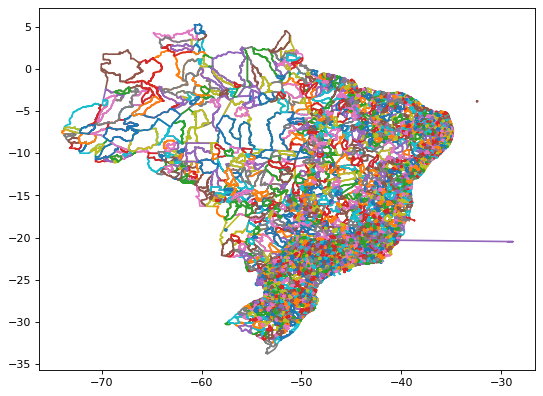

In [54]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt




sf = shp.Reader("BR_Municipios_2020.shp")

plt.figure(figsize=(8, 6), dpi=80)


for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [55]:
sf.shapeRecords()

ShapeRecords: [<shapefile.ShapeRecord object at 0x7fedc1383a30>, <shapefile.ShapeRecord object at 0x7fedc1383b80>, <shapefile.ShapeRecord object at 0x7fedc1383910>, <shapefile.ShapeRecord object at 0x7fedc1c55370>, <shapefile.ShapeRecord object at 0x7fedc1c557f0>, <shapefile.ShapeRecord object at 0x7ff193683e20>, <shapefile.ShapeRecord object at 0x7fedc2105880>, <shapefile.ShapeRecord object at 0x7fedc20aa370>, <shapefile.ShapeRecord object at 0x7fedc26e4b50>, <shapefile.ShapeRecord object at 0x7fedf85d8640>, <shapefile.ShapeRecord object at 0x7fedc140e040>, <shapefile.ShapeRecord object at 0x7fedf89eeb20>, <shapefile.ShapeRecord object at 0x7fedbfbf6340>, <shapefile.ShapeRecord object at 0x7fedbfbf6250>, <shapefile.ShapeRecord object at 0x7fedbf843070>, <shapefile.ShapeRecord object at 0x7fedbf843820>, <shapefile.ShapeRecord object at 0x7fedbf843130>, <shapefile.ShapeRecord object at 0x7fedc1c96a60>, <shapefile.ShapeRecord object at 0x7fedc1c968e0>, <shapefile.ShapeRecord object at 0x

In [48]:
temp2 = df[df.ID == 2103307]

temp2[temp2.murder_threats.isna()].groupby(['year']).size()

temp2 = temp2.reset_index(drop=True)

In [49]:
df[(df.x == temp2.x[0]) & (df.y == temp2.y[0])]

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
128445,2103307,-1.0,9768963,-44.325,-4.875,2002,79.0,75.00,19.78558,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
290626,2103307,10.0,9768963,-44.325,-4.875,2003,78.0,80.25,20.41331,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
460468,2103307,9.0,9768963,-44.325,-4.875,2004,88.0,83.00,24.90946,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
628995,2103307,0.0,9768963,-44.325,-4.875,2005,97.0,82.00,20.28300,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
792394,2103307,-30.0,9768963,-44.325,-4.875,2006,97.0,86.00,23.37695,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
955879,2103307,-15.0,9768963,-44.325,-4.875,2007,67.0,71.25,18.39221,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
1122616,2103307,17.0,9768963,-44.325,-4.875,2008,52.0,62.75,26.71084,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
1292023,2103307,17.0,9768963,-44.325,-4.875,2009,69.0,77.50,28.68798,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
1454199,2103307,-3.0,9768963,-44.325,-4.875,2010,86.0,86.50,19.12877,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000
1616382,2103307,-7.0,9768963,-44.325,-4.875,2011,83.0,69.00,24.57071,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000


In [35]:
#first fix mojui de campos 1504752

#second fix 2103307

In [45]:
temp = df[df.ID == 1504752]

temp[temp.murder_threats.isna()].groupby(['year']).size()

temp = temp.reset_index(drop=True)

In [47]:
df[(df.x == temp.x[0]) & (df.y == temp.y[0])]

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
1903846,1504752,4.0,9012949,-54.825,-3.525,2013,89.0,91.00,37.32522,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
2064446,1504752,-1.0,9012949,-54.825,-3.525,2014,93.0,86.25,28.93409,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
2225046,1504752,5.0,9012949,-54.825,-3.525,2015,92.0,87.75,24.33447,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.000000
2385598,1504752,0.0,9012949,-54.825,-3.525,2016,97.0,88.25,32.66033,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,20072.936962,13137.800251,33210.737213


In [46]:
temp.x[0]

-54.82499999999999

In [36]:
temp.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,expen_other_agr,expen_agr_defense,expen_min_fuel,illegal_mining,illegal_other,illegal_industry,audits,emiss_pec_full,emiss_agr_full,emiss_agropec_full
1903846,1504752,4.0,9012949,-54.825,-3.525,2013,89.0,91.00,37.32522,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1903847,1504752,-6.0,9012950,-54.825,-3.475,2013,95.0,82.25,36.88644,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1903848,1504752,-4.0,9012951,-54.825,-3.425,2013,97.0,85.25,37.33991,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1903849,1504752,3.0,9012952,-54.825,-3.375,2013,94.0,93.50,37.19464,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1903850,1504752,0.0,9012953,-54.825,-3.325,2013,97.0,88.50,37.92974,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [268]:
df[df.murder_threats.isna()].groupby(['ID']).size()

ID
1504752    672
2102374     15
2103307    480
2109304     15
2111748     45
2112704     15
2211209     15
2911105     15
2928901     15
5204904     15
dtype: int64

In [33]:
df[df.murder_threats.isna()].groupby(['year']).size()

year
2002     42
2003     42
2004     42
2005     42
2006     42
2007     42
2008     42
2009     42
2010     42
2011     42
2012     42
2013    210
2014    210
2015    210
2016    210
dtype: int64

In [32]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [ ]:
#check that the merge worked
#df[(df.year == 2016) & (df.ID == 1100015) & (df.FID == 8454645)].emiss_pec_full.values[0] + df[(df.year == 2016) & (df.ID == 1100015) & (df.FID == 8454645)].emiss_agr_full.values[0] == df[(df.year == 2016) & (df.ID == 1100015) & (df.FID == 8454645)].emiss_agropec_full.values[0]

In [ ]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [93]:
#df[df.illegal_mining.isna()].groupby(['ID']).size()

In [94]:
#df[df.expen_mining.isna()].groupby(['ID']).size()

## Illegal mining data by municipality

In [96]:
#this is also in year_deforest so I don't double merge
illegal_mine = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/illegal_mining.csv')
#df = pd.merge(df, illegal_mine,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

#illegal_mine.head()


TimeoutError: [Errno 60] Operation timed out

## Violence 

In [47]:
#made all NAs 0 here
#ended up also commenting this out because it's repeated in the year_deforest dataset

#violence = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/violence_all.csv')
#violence.fillna(0)
#violence = violence[['year', 'murder_threats', 'assassination', 'assassination_attempt', 'munic_id']]
#df = pd.merge(df, violence,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

## Fines

In [48]:
#also in year_deforest

#fines = pd.read_csv('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/fines.csv')
#fines = fines[['munic_id', 'year', 'f_emitted_count']]
#df = pd.merge(df, fines,  how = 'left', left_on = ['ID','year'], right_on = ['munic_id','year'])

#fines.head()

In [49]:
#dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

## Political Variables

In [50]:
path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/legal_amazon_muncipalities_panel2001to2019.dta'

legal = pd.read_stata(path)
legal['forestplantaon'] = legal['forestplantaon'].fillna(0)
legal['soybean'] = legal['soybean'].fillna(0)
legal['sugarcane'] = legal['sugarcane'].fillna(0)




legal = legal[['id', 'municipality', 'state', 'region', 'year', 'pmv',
       'forestformation', 'forestplantaon', 'pasture', 'sugarcane', 'soybean',
       'yrmean_maxtemp', 'yrmean_pdsi', 'yrmean_prec', 'firetotal',
         'cowratio',
       'totalfineadj', 'adi', 'gfwlosssqkm', 'incremento',
       'forest_extent_sqkm', 'SFlosssqkm', 'SFincrement', 'sf1to8', 'sf9to16',
       'sf17to24', 'sf25to34']]

In [51]:
dict(sorted((legal.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'id': 0,
 'municipality': 0,
 'state': 0,
 'region': 0,
 'year': 0,
 'pmv': 0,
 'forestformation': 0,
 'forestplantaon': 0,
 'pasture': 0,
 'sugarcane': 0,
 'soybean': 0,
 'yrmean_maxtemp': 0,
 'yrmean_pdsi': 0,
 'yrmean_prec': 0,
 'firetotal': 0,
 'cowratio': 0,
 'totalfineadj': 0,
 'adi': 0,
 'gfwlosssqkm': 0,
 'incremento': 0,
 'forest_extent_sqkm': 0,
 'SFlosssqkm': 0,
 'SFincrement': 0,
 'sf1to8': 0,
 'sf9to16': 0,
 'sf17to24': 0,
 'sf25to34': 0}

In [52]:
#count fines and gdp per capita we already have and pop den

#drop yearpmv, pmv municipios verdes program participation, opt in, self selection so hard to test effect
#aid, tax benefits, in exchange for limiting deforestation and other forest code guidelines
#want more municipalities to register & keep deforestation under code levels, state/fed help & subsidies

#soybean and forest plantation missing values should be 0s DONE

#nonagvaladd data not available for 2001 and 2019, can drop for now since we have workforce in non ag as proxy

In [53]:
legal['year']= legal['year'].apply(lambda x: x.year)

In [54]:
df = pd.merge(df, legal,  how = 'left', left_on = ['ID','year'], right_on = ['id','year'])

In [55]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [56]:
#check where gaps in political variables occurr: 
df[df.sf25to34.isna()].groupby(['ID']).size()


ID
1504752     672
2102374      15
2103307     480
2109304      15
2111748      45
2112704      15
2211209      15
2911105      15
2928901      15
5104526    1344
5104542    1176
5204904      15
dtype: int64

In [279]:
df[df.adi.isna()].groupby(['ID']).size()

ID
1504752    14
2103307    15
2109304     1
2111748     1
2112704     1
2911105     1
5104526    25
5104542    32
dtype: int64

In [280]:
#check where gaps in expenditure
df[df.expen_petrol.isna()].groupby(['ID']).size()


ID
1504752    14
2103307    15
2109304     1
2111748     1
2112704     1
2911105     1
dtype: int64

In [281]:
df[df.murder_threats.isna()].groupby(['ID']).size()

#1504752 is Mojuí dos Campos, started 2006


ID
1504752    14
2103307    15
2109304     1
2111748     1
2112704     1
2911105     1
dtype: int64

In [106]:
#might be better to use other data than elec here, 

#candidate level dataset, more cands than muns, need to collapse to mun level
#this includes those that didn't win but not margin of victory 

#cand prefeito vote, includes vote counts for all of the candidates
#1996 doesn't have the cpf but we start in 2000
#cand prefeito includes the characteristics of each cand, merge to get votes (on cpf, )

#votes one has fewer cands, id candidato bd

#percentage of votes for prefeito, and margin of victory 

#effects of reelection and term limits, if the mayor appears 

#if person in office in 1996 term limited in 2004
#create one variable for if the person is an encumbant running for reelection, person in 1996 running in 2000 (binary)
#encumbant wins reelection (in next election will be term limited)

#first term or second term binary variables 
#percentage of votes and margin of victory

#resultado 

#keep sigla partido of the winner and coalition 

#keep age gender job of winner 



In [107]:
#create 3rd dataset at the municipality level that I'm going to merge in for Kathryn 

In [108]:
# path_2 = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/CSV/elections_munic.xlsx'
# elec = pd.read_excel(path_2)
# elec.head()

# dict(sorted((elec.isna().sum()).to_dict().items(), key=lambda item: item[1]))
# elec[elec.el_votos_p.isna()].groupby(['ano']).size()
# elec[elec.el_votos_p.isna()].groupby(['id']).size()

In [109]:
elec = pd.read_csv('/Users/annieulichney/Documents/GitHub/Deforestation/ElectionCleanedData.csv', index_col = [0])

In [110]:
elec.head()

,ano,id_municipio,id_candidato_bd,sigla_partido,votos_winner,votos,incumbant_run,incumbant_win,term_lim_seat,margin,votos_pct,genero,ocupacao,instrucao,idade
0,2000,2708907,1265591.0,PSD,3147,4882,0.0,0.0,0.0,1412.0,0.644613,masculino,proprietario de estabelecimento comercial,ensino medio completo,45.0
1,2000,1302553,19147.0,PST,1455,5658,0.0,0.0,0.0,155.0,0.257158,masculino,medico,ensino superior completo,31.0
2,2000,2903300,1071793.0,PAN,2135,3598,0.0,0.0,0.0,708.0,0.593385,masculino,outros,ensino superior completo,51.0
3,2000,2906907,962907.0,PSD,4614,8760,0.0,0.0,0.0,640.0,0.526712,masculino,outros,ensino fundamental incompleto,58.0
4,2000,2908606,1523132.0,PST,3643,8872,0.0,0.0,0.0,1015.0,0.410618,masculino,proprietario de estabelecimento comercial,ensino fundamental completo,42.0


In [111]:
dict(sorted((elec.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ano': 0,
 'id_municipio': 0,
 'sigla_partido': 0,
 'votos_winner': 0,
 'votos': 0,
 'incumbant_run': 0,
 'incumbant_win': 0,
 'term_lim_seat': 0,
 'margin': 0,
 'votos_pct': 0,
 'idade': 787,
 'ocupacao': 47197,
 'genero': 47787,
 'instrucao': 48579,
 'id_candidato_bd': 91981}

In [112]:
df.shape

(10113, 193)

In [113]:
df = pd.merge(df, elec,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','ano'])

In [114]:
df.shape

(14386, 208)

In [115]:
df.year

0        2006
1        2013
2        2012
3        2009
4        2004
         ... 
14381    2002
14382    2008
14383    2015
14384    2012
14385    2015
Name: year, Length: 14386, dtype: int32

In [116]:
#make list of 3x cands
#make summary of NAs

#sit/situacao_candidatura variable in original, check if the 3 term people are denied, code and word, word is deferido

#cod sit candidatura, deferido, deferido con recurso (initially denied then accepted), 
#cod sit candidatura === 2 
#number of candidates per municipality, how attractive office is in that mun

#turno, numero turno 1/2, large muns, if cand doesn't get 50+% have runoffs, same mun two elections, 
#identify muns that have runoffs, indicator, num cands in first term, margin in second term keep 



In [117]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [118]:
dict(df[df.sigla_partido.isna()].groupby(['ID']).size())

{1100015: 10,
 1100023: 5,
 1100031: 4,
 1100049: 6,
 1100056: 4,
 1100072: 4,
 1100080: 7,
 1100098: 4,
 1100106: 26,
 1100114: 3,
 1100122: 9,
 1100130: 17,
 1100148: 2,
 1100155: 5,
 1100189: 12,
 1100205: 48,
 1100254: 4,
 1100262: 5,
 1100288: 1,
 1100296: 2,
 1100304: 11,
 1100320: 7,
 1100338: 16,
 1100346: 2,
 1100379: 5,
 1100403: 2,
 1100452: 5,
 1100502: 1,
 1100601: 7,
 1100700: 6,
 1100809: 10,
 1100908: 2,
 1100924: 12,
 1100940: 4,
 1101005: 5,
 1101104: 4,
 1101302: 2,
 1101401: 3,
 1101435: 1,
 1101450: 1,
 1101468: 6,
 1101492: 15,
 1101500: 5,
 1101609: 4,
 1101708: 3,
 1101757: 9,
 1101807: 3,
 1200013: 5,
 1200054: 6,
 1200104: 3,
 1200138: 1,
 1200179: 3,
 1200203: 20,
 1200252: 1,
 1200302: 48,
 1200328: 8,
 1200336: 14,
 1200344: 19,
 1200351: 13,
 1200393: 5,
 1200401: 19,
 1200427: 3,
 1200435: 13,
 1200450: 4,
 1200500: 43,
 1200609: 31,
 1200708: 6,
 1200807: 5,
 1300029: 8,
 1300060: 5,
 1300086: 2,
 1300102: 11,
 1300144: 71,
 1300201: 114,
 1300300: 18,
 

## Finbra

In [119]:
#codes aren't merging correctly here, there's an issue with municpality ids being different!

In [120]:
#

In [121]:
#can't find 7 digit code for 1504752 
#{'ibge7_code': , 'ibge6_code': 89, 'tse_code': 93, 'mesoregion': 99, 'microregion': 99, 'UF': }


#1504752 
#2103307    
#2111748    

In [122]:
#url = 'https://raw.githubusercontent.com/ekatovich/Municipality_Name_ID_crosswalk/master/Raw_Brazil_GeographicalUnits.csv'
url = '/Users/annieulichney/Desktop/BrazilMunicipalIdentifiers.csv'
codes_df = pd.read_csv(url, header = 0, encoding='latin-1')



In [123]:
#add 6 digit codes to main dataframe
df = df.merge(codes_df[['ibge7_code', 'ibge6_code']], how = 'left', left_on = 'ID', right_on = 'ibge7_code')

In [124]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

In [125]:
#pib.Rdata
finbra_read = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/finbra2001-2015.Rdata')
finbra_df = pd.DataFrame(finbra_read['finbra_2001_2015'])

finbra_df.cd_ibge_6 = finbra_df.cd_ibge_6.astype(int)
finbra_df.y = finbra_df.y.astype(int)

finbra_df.head()
#df = pd.merge(df, finbra_df,  how = 'left', left_on = ['ID','year'], right_on = ['cd_ibge_6','y'])

,cd_ibge_6,y,rev_total,rev_curr,rev_trib,rev_tax,rev_fee,rev_tr_curr,rev_tr_fed,rev_tr_stt,...,exp_ind,exp_heal_san,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id,id2
0,431453,2001,2758335.41,2758335.41,6.555268e+04,4.331561e+04,22237.070000,2547699.62,1512795.74,1034903.88,...,362316.540000,265031.240,22846.1500,0.0,5337.26,0.00,NaN,NaN,.2001,4314532001
1,431453,2002,1973343.31,2136505.56,1.184666e+05,1.013939e+05,16159.060000,1924668.31,668256.74,1230217.45,...,3733.949951,452991.125,0.0000,278591.8,16365.81,40513.07,NaN,NaN,.2002,4314532002
2,421265,2013,9365629.00,9365629.00,1.260199e+05,1.089185e+05,12907.500000,9154815.00,6183653.00,2237162.00,...,16886.099609,988255.000,138301.4375,0.0,0.00,0.00,1492860.125,NaN,.2013,4212652013
3,500627,2013,20841374.00,20725176.00,2.806561e+06,2.773809e+06,32752.500000,17692492.00,6929948.50,10463405.00,...,0.000000,3325298.500,613889.8750,48373.0,0.00,0.00,4512029.000,NaN,.2013,5006272013
4,150475,2013,25632392.00,25632392.00,9.417746e+05,9.291695e+05,12605.080078,24414776.00,10333942.00,2591715.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.2013,1504752013


In [126]:
dict(sorted((finbra_df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'cd_ibge_6': 0,
 'y': 0,
 'id': 0,
 'id2': 0,
 'codigo': 15,
 'rev_total': 16,
 'rev_curr': 16,
 'rev_trib': 16,
 'rev_tax': 16,
 'rev_fee': 16,
 'rev_tr_curr': 16,
 'rev_tr_fed': 16,
 'rev_tr_stt': 17,
 'rev_cap': 17,
 'exp_total': 241,
 'exp_leg': 241,
 'exp_jud': 241,
 'exp_agr': 241,
 'exp_ed_cult': 241,
 'exp_hab': 241,
 'exp_ind': 241,
 'exp_heal_san': 241,
 'exp_assist': 241,
 'exp_transp': 241,
 'exp_secur': 241,
 'exp_energy': 241,
 'rev_tr_mun': 5469,
 'rev_tr_mult': 5469,
 'rev_agr': 5469,
 'rev_curr_oth': 15508,
 'exp_admin': 16490,
 'exp_cap': 63393,
 'rev_tr_curr_oth': 64151,
 'rev_tr_oth': 74190}

In [127]:
finbra_df

,cd_ibge_6,y,rev_total,rev_curr,rev_trib,rev_tax,rev_fee,rev_tr_curr,rev_tr_fed,rev_tr_stt,...,exp_ind,exp_heal_san,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id,id2
0,431453,2001,2.758335e+06,2.758335e+06,6.555268e+04,4.331561e+04,2.223707e+04,2.547700e+06,1.512796e+06,1.034904e+06,...,3.623165e+05,2.650312e+05,2.284615e+04,0.000000e+00,5.337260e+03,0.000000e+00,NaN,NaN,.2001,4314532001
1,431453,2002,1.973343e+06,2.136506e+06,1.184666e+05,1.013939e+05,1.615906e+04,1.924668e+06,6.682567e+05,1.230217e+06,...,3.733950e+03,4.529911e+05,0.000000e+00,2.785918e+05,1.636581e+04,4.051307e+04,NaN,NaN,.2002,4314532002
2,421265,2013,9.365629e+06,9.365629e+06,1.260199e+05,1.089185e+05,1.290750e+04,9.154815e+06,6.183653e+06,2.237162e+06,...,1.688610e+04,9.882550e+05,1.383014e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.492860e+06,NaN,.2013,4212652013
3,500627,2013,2.084137e+07,2.072518e+07,2.806561e+06,2.773809e+06,3.275250e+04,1.769249e+07,6.929948e+06,1.046340e+07,...,0.000000e+00,3.325298e+06,6.138899e+05,4.837300e+04,0.000000e+00,0.000000e+00,4.512029e+06,NaN,.2013,5006272013
4,150475,2013,2.563239e+07,2.563239e+07,9.417746e+05,9.291695e+05,1.260508e+04,2.441478e+07,1.033394e+07,2.591715e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.2013,1504752013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79639,522230,2012,1.351721e+07,1.544733e+07,1.187842e+06,1.181899e+06,5.943280e+03,1.412793e+07,7.123859e+06,4.577965e+06,...,3.460486e+05,2.689667e+06,8.631386e+05,4.967377e+05,0.000000e+00,0.000000e+00,1.674587e+06,5.222302e+06,52223022012,5222302012
79640,522230,2013,1.811173e+07,1.789173e+07,1.042245e+06,1.030196e+06,1.204840e+04,1.679562e+07,7.619004e+06,6.433764e+06,...,1.109080e+05,3.361664e+06,9.963528e+05,2.368516e+05,0.000000e+00,0.000000e+00,2.457511e+06,5.222302e+06,52223022013,5222302013
79641,522230,2014,1.914798e+07,1.821412e+07,6.581836e+05,6.413223e+05,1.686127e+04,1.746049e+07,8.298852e+06,6.390106e+06,...,3.600722e+05,3.688938e+06,1.025383e+06,1.055815e+05,0.000000e+00,0.000000e+00,2.167078e+06,5.222302e+06,52223022014,5222302014
79642,522230,2015,1.970494e+07,1.929254e+07,8.276906e+05,8.100056e+05,1.768507e+04,1.834481e+07,8.892128e+06,6.603110e+06,...,1.621564e+05,3.959784e+06,1.232056e+06,1.320656e+05,5.117601e+04,0.000000e+00,1.565677e+06,5.222302e+06,52223022015,5222302015


In [128]:
pd.merge(df, finbra_df,  how = 'left', left_on = ['ID','year'], right_on = ['cd_ibge_6','y'])

,ID,forest.diff,FID,x,y_x,year,forest.l,nn_forest.l,rain1,elevation,...,exp_ind,exp_heal_san,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id_y,id2
0,5107925,11.0,8940737,-55.825,-13.225,2006,28.0,27.25,27.97495,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2112308,-6.0,9743744,-44.675,-5.825,2013,42.0,44.25,14.66136,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1400472,-4.0,8516107,-61.725,-0.625,2012,97.0,95.00,43.29452,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1304104,5.0,8213551,-65.925,-7.125,2009,92.0,94.75,37.07212,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1505502,11.0,9563793,-47.175,-3.375,2004,40.0,48.25,20.06341,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14381,1303502,0.0,8033515,-68.425,-8.025,2002,97.0,97.00,34.86647,171.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14382,1500602,0.0,9084941,-53.825,-5.725,2008,97.0,93.00,27.95056,298.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14383,1400472,-30.0,8602537,-60.525,0.425,2015,92.0,91.75,22.48222,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14384,5104609,-1.0,8983865,-55.225,-17.525,2012,36.0,37.00,16.14718,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
dir_read = pyreadr.read_r('/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/diretorio.Rdata')
dir_df = dir_read['df.diretorio']

In [130]:
dir_df.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,municipio,capital_uf,id_comarca,id_regiao_saude,regiao_saude,...,microrregiao,id_mesorregiao,mesorregiao,id_uf,sigla_uf,uf,regiao,existia_1991,existia_2000,existia_2010
0,1100023,110002,78,7,9393,Ariquemes,0,1100023,11001,Vale do Jamari,...,Ariquemes,1102,Leste Rondoniense,11,RO,Rondônia,Norte,1,1,1
1,1100106,110010,19,1,22882,Guajará-Mirim,0,1100106,11004,Madeira-Mamoré,...,Guajará-Mirim,1101,Madeira-Guaporé,11,RO,Rondônia,Norte,1,1,1
2,1100114,110011,159,15,41258,Jaru,0,1100114,11003,Central,...,Ji-Paraná,1102,Leste Rondoniense,11,RO,Rondônia,Norte,1,1,1
3,1100130,110013,396,39,44547,Machadinho D'Oeste,0,1100122,11001,Vale do Jamari,...,Ariquemes,1102,Leste Rondoniense,11,RO,Rondônia,Norte,1,1,1
4,1100205,110020,35,3,30719,Porto Velho,1,1100205,11004,Madeira-Mamoré,...,Porto Velho,1101,Madeira-Guaporé,11,RO,Rondônia,Norte,1,1,1


In [131]:
finbra_merged = pd.merge(finbra_df, dir_df[['id_municipio', 'id_municipio_6']],  how = 'left', left_on = ['cd_ibge_6'], right_on = ['id_municipio_6'])
finbra_merged.head()

,cd_ibge_6,y,rev_total,rev_curr,rev_trib,rev_tax,rev_fee,rev_tr_curr,rev_tr_fed,rev_tr_stt,...,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id,id2,id_municipio,id_municipio_6
0,431453,2001,2758335.41,2758335.41,6.555268e+04,4.331561e+04,22237.070000,2547699.62,1512795.74,1034903.88,...,22846.1500,0.0,5337.26,0.00,NaN,NaN,.2001,4314532001,NaN,NaN
1,431453,2002,1973343.31,2136505.56,1.184666e+05,1.013939e+05,16159.060000,1924668.31,668256.74,1230217.45,...,0.0000,278591.8,16365.81,40513.07,NaN,NaN,.2002,4314532002,NaN,NaN
2,421265,2013,9365629.00,9365629.00,1.260199e+05,1.089185e+05,12907.500000,9154815.00,6183653.00,2237162.00,...,138301.4375,0.0,0.00,0.00,1492860.125,NaN,.2013,4212652013,4212650.0,421265.0
3,500627,2013,20841374.00,20725176.00,2.806561e+06,2.773809e+06,32752.500000,17692492.00,6929948.50,10463405.00,...,613889.8750,48373.0,0.00,0.00,4512029.000,NaN,.2013,5006272013,5006275.0,500627.0
4,150475,2013,25632392.00,25632392.00,9.417746e+05,9.291695e+05,12605.080078,24414776.00,10333942.00,2591715.00,...,NaN,NaN,NaN,NaN,NaN,NaN,.2013,1504752013,1504752.0,150475.0


In [132]:
df_test = pd.merge(df, finbra_merged,  how = 'left', left_on = ['ID','year'], right_on = ['id_municipio','y'])
df_test.head()

,ID,forest.diff,FID,x,y_x,year,forest.l,nn_forest.l,rain1,elevation,...,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id_y,id2,id_municipio_y,id_municipio_6
0,5107925,11.0,8940737,-55.825,-13.225,2006,28.0,27.25,27.97495,447.0,...,2880648.250,4390030.58,619392.53,0.00,5324332.23,5107925.0,51079252006,5107922006,5107925.0,510792.0
1,2112308,-6.0,9743744,-44.675,-5.825,2013,42.0,44.25,14.66136,212.0,...,0.000,0.00,0.00,0.00,1.00,2112308.0,21123082013,2112302013,2112308.0,211230.0
2,1400472,-4.0,8516107,-61.725,-0.625,2012,97.0,95.00,43.29452,54.0,...,1286613.250,3389971.00,0.00,911078.56,5332174.89,1400472.0,14004722012,1400472012,1400472.0,140047.0
3,1304104,5.0,8213551,-65.925,-7.125,2009,92.0,94.75,37.07212,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1505502,11.0,9563793,-47.175,-3.375,2004,40.0,48.25,20.06341,78.0,...,1983015.125,208647.70,0.00,0.00,6831325.30,1505502.0,15055022004,1505502004,1505502.0,150550.0


In [133]:
dict(sorted((df_test.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y_x': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MA

In [134]:
df_test[df_test.exp_energy.isna()].groupby(['ID']).size()


ID
1100015     1
1100023     2
1100064     1
1100098     2
1100106    80
           ..
5108600     4
5108808     1
5108857     1
5108907     5
5108956     2
Length: 363, dtype: int64

In [135]:
#df = pd.merge(df, finbra_df,  how = 'left', left_on = ['ID','year'], right_on = ['cd_ibge_6','y'])

In [136]:
dir_df[['id_municipio', 'id_municipio_6']]

,id_municipio,id_municipio_6
0,1100023,110002
1,1100106,110010
2,1100114,110011
3,1100130,110013
4,1100205,110020
...,...,...
5565,2311801,231180
5566,2312502,231250
5567,2312700,231270
5568,2313005,231300


In [137]:
finbra_df.head()

,cd_ibge_6,y,rev_total,rev_curr,rev_trib,rev_tax,rev_fee,rev_tr_curr,rev_tr_fed,rev_tr_stt,...,exp_ind,exp_heal_san,exp_assist,exp_transp,exp_secur,exp_energy,exp_admin,codigo,id,id2
0,431453,2001,2758335.41,2758335.41,6.555268e+04,4.331561e+04,22237.070000,2547699.62,1512795.74,1034903.88,...,362316.540000,265031.240,22846.1500,0.0,5337.26,0.00,NaN,NaN,.2001,4314532001
1,431453,2002,1973343.31,2136505.56,1.184666e+05,1.013939e+05,16159.060000,1924668.31,668256.74,1230217.45,...,3733.949951,452991.125,0.0000,278591.8,16365.81,40513.07,NaN,NaN,.2002,4314532002
2,421265,2013,9365629.00,9365629.00,1.260199e+05,1.089185e+05,12907.500000,9154815.00,6183653.00,2237162.00,...,16886.099609,988255.000,138301.4375,0.0,0.00,0.00,1492860.125,NaN,.2013,4212652013
3,500627,2013,20841374.00,20725176.00,2.806561e+06,2.773809e+06,32752.500000,17692492.00,6929948.50,10463405.00,...,0.000000,3325298.500,613889.8750,48373.0,0.00,0.00,4512029.000,NaN,.2013,5006272013
4,150475,2013,25632392.00,25632392.00,9.417746e+05,9.291695e+05,12605.080078,24414776.00,10333942.00,2591715.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.2013,1504752013


In [138]:
df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,incumbant_win,term_lim_seat,margin,votos_pct,genero,ocupacao,instrucao,idade,ibge7_code,ibge6_code
0,5107925,11.0,8940737,-55.825,-13.225,2006,28.0,27.25,27.97495,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5107925.0,510792.0
1,2112308,-6.0,9743744,-44.675,-5.825,2013,42.0,44.25,14.66136,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112308.0,211230.0
2,1400472,-4.0,8516107,-61.725,-0.625,2012,97.0,95.00,43.29452,54.0,...,0.0,0.0,2909.0,0.620997,masculino,empresario,ensino medio completo,45.0,1400472.0,140047.0
3,1304104,5.0,8213551,-65.925,-7.125,2009,92.0,94.75,37.07212,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1304104.0,130410.0
4,1505502,11.0,9563793,-47.175,-3.375,2004,40.0,48.25,20.06341,78.0,...,0.0,0.0,5635.0,0.572284,masculino,advogado,ensino superior completo,41.0,1505502.0,150550.0


In [139]:
dict(sorted((df.isna().sum()).to_dict().items(), key=lambda item: item[1]))

{'ID': 0,
 'forest.diff': 0,
 'FID': 0,
 'x': 0,
 'y': 0,
 'year': 0,
 'forest.l': 0,
 'nn_forest.l': 0,
 'rain1': 0,
 'elevation': 0,
 'slope': 0,
 'aspect': 0,
 'near_mines': 0,
 'near_roads': 0,
 'near_hidrovia': 0,
 'indigenous_homol': 0,
 'mun_election_year': 0,
 'new_forest_code': 0,
 'lula': 0,
 'dilma': 0,
 'temer': 0,
 'bolsonaro': 0,
 'fed_election_year': 0,
 'populacao': 0,
 'pib_pc': 0,
 'ironore': 0,
 'silver': 0,
 'copper': 0,
 'gold': 0,
 'soy_price': 0,
 'beef_price': 0,
 'ag_jobs': 0,
 'mining_jobs': 0,
 'public_jobs': 0,
 'construction_jobs': 0,
 'PIB': 0,
 'n_companies_PUBLIC ADMIN': 0,
 'n_companies_AGRICULTURE': 0,
 'n_companies_FOOD AND DRINKS': 0,
 'n_companies_ACCOMODATION AND FOOD': 0,
 'n_companies_EQUIPMENT RENTAL': 0,
 'n_companies_WHOLESALE': 0,
 'n_companies_ASSOCIATIVE ACTIVITIES': 0,
 'n_companies_AUTOMOBILES AND TRANSPORT': 0,
 'n_companies_FINANCIAL ASSISTANCE': 0,
 'n_companies_TRADE REP VEHICLES': 0,
 'n_companies_CONSTRUCTION': 0,
 'n_companies_MAIL

## Drop NAs (for Now)

In [140]:
#todo: clean duplicate columns

In [141]:
#I think I need to drop the jobs variables, since they're correlated w the other n_jobs variables

In [142]:
df = df[['ID', 'forest.diff', 'FID', 'x', 'y', 'year', 'forest.l',
       'nn_forest.l', 'rain1', 'elevation', 'slope', 'aspect',
       'near_mines', 'near_roads', 'near_hidrovia', 'indigenous_homol',
       'mun_election_year', 'new_forest_code', 'lula', 'dilma', 'temer',
       'bolsonaro', 'fed_election_year', 'populacao', 'pib_pc', 'ironore',
       'silver', 'copper', 'gold', 'soy_price', 'beef_price', 'PIB',
       'n_companies_PUBLIC ADMIN', 'n_companies_AGRICULTURE',
       'n_companies_FOOD AND DRINKS', 'n_companies_ACCOMODATION AND FOOD',
       'n_companies_EQUIPMENT RENTAL', 'n_companies_WHOLESALE',
       'n_companies_ASSOCIATIVE ACTIVITIES',
       'n_companies_AUTOMOBILES AND TRANSPORT',
       'n_companies_FINANCIAL ASSISTANCE',
       'n_companies_TRADE REP VEHICLES', 'n_companies_CONSTRUCTION',
       'n_companies_MAIL AND TELECOM', 'n_companies_CULTURE AND SPORT',
       'n_companies_EDITING AND PRINTING', 'n_companies_EDUCATION',
       'n_companies_ELECTRICITY AND GAS', 'n_companies_FINANCES',
       'n_companies_CLEANING AND SEWAGE', 'n_companies_MACHINERY',
       'n_companies_BASIC METALLURGY', 'n_companies_MINING',
       'n_companies_WOOD PROD',
       'n_companies_NON-METALLIC MINERAL PRODUCTS', 'n_companies_HEALTH',
       'n_companies_SERVICES FOR COMPANIES',
       'n_companies_PERSONAL SERVICES', 'n_companies_TRANSPORTATION',
       'n_companies_GROUND TRANSPORT',
       'n_companies_WATER TREATMENT AND DISTRIBUTION',
       'n_companies_RETAIL', 'n_companies_COMPUTING',
       'n_companies_INSURANCE AND SOCIAL SECURITY',
       'n_companies_METALLIC PRODUCTS', 'n_companies_DOMESTIC SERVICES',
       'n_companies_FORESTRY', 'n_companies_CLOTHING',
       'n_companies_PAPER', 'n_companies_INTERNATIONAL BODIES',
       'n_companies_OIL AND GAS', 'n_companies_FISHING AND AQUACULTURE',
       'n_companies_CHEMICALS', 'n_companies_WATER-BASED TRANSPORTATION',
       'n_companies_REAL ESTATE', 'n_companies_RECYCLING',
       'n_companies_LEATHERS AND FOOTWEAR',
       'n_companies_RUBBER AND PLASTIC', 'n_companies_TEXTILES',
       'n_companies_RESEARCH AND DEVELOPMENT',
       'n_companies_AERO TRANSPORT', 'n_companies_SMOKE',
       'n_companies_PETROLEUM REFINING', 'n_companies_',
       'n_jobs_PUBLIC ADMIN', 'n_jobs_AGRICULTURE',
       'n_jobs_FOOD AND DRINKS', 'n_jobs_ACCOMODATION AND FOOD',
       'n_jobs_EQUIPMENT RENTAL', 'n_jobs_WHOLESALE',
       'n_jobs_ASSOCIATIVE ACTIVITIES',
       'n_jobs_AUTOMOBILES AND TRANSPORT', 'n_jobs_FINANCIAL ASSISTANCE',
       'n_jobs_TRADE REP VEHICLES', 'n_jobs_CONSTRUCTION',
       'n_jobs_MAIL AND TELECOM', 'n_jobs_CULTURE AND SPORT',
       'n_jobs_EDITING AND PRINTING', 'n_jobs_EDUCATION',
       'n_jobs_ELECTRICITY AND GAS', 'n_jobs_FINANCES',
       'n_jobs_CLEANING AND SEWAGE', 'n_jobs_MACHINERY',
       'n_jobs_BASIC METALLURGY', 'n_jobs_MINING', 'n_jobs_WOOD PROD',
       'n_jobs_NON-METALLIC MINERAL PRODUCTS', 'n_jobs_HEALTH',
       'n_jobs_SERVICES FOR COMPANIES', 'n_jobs_PERSONAL SERVICES',
       'n_jobs_TRANSPORTATION', 'n_jobs_GROUND TRANSPORT',
       'n_jobs_WATER TREATMENT AND DISTRIBUTION', 'n_jobs_RETAIL',
       'n_jobs_COMPUTING', 'n_jobs_INSURANCE AND SOCIAL SECURITY',
       'n_jobs_METALLIC PRODUCTS', 'n_jobs_DOMESTIC SERVICES',
       'n_jobs_FORESTRY', 'n_jobs_CLOTHING', 'n_jobs_PAPER',
       'n_jobs_INTERNATIONAL BODIES', 'n_jobs_OIL AND GAS',
       'n_jobs_FISHING AND AQUACULTURE', 'n_jobs_CHEMICALS',
       'n_jobs_WATER-BASED TRANSPORTATION', 'n_jobs_REAL ESTATE',
       'n_jobs_RECYCLING', 'n_jobs_LEATHERS AND FOOTWEAR',
       'n_jobs_RUBBER AND PLASTIC', 'n_jobs_TEXTILES',
       'n_jobs_RESEARCH AND DEVELOPMENT', 'n_jobs_AERO TRANSPORT',
       'n_jobs_SMOKE', 'n_jobs_PETROLEUM REFINING', 'n_jobs_',
       'n_jobs_TOTAL INDUSTRIAL', 'n_jobs_TOTAL SERVICE',
       'n_companies_TOTAL INDUSTRIAL', 'n_companies_TOTAL SERVICE',
       'n_companies_TOTAL', 'n_jobs_TOTAL', 'murder_threats',
       'assassination', 'assassination_attempt', 'f_emitted_count',
       'expen_agri', 'expen_env_man', 'expen_agr_org', 'expen_mining',
       'expen_petrol', 'expen_prom_ani_pro', 'expen_prom_veg_pro',
       'expen_other_agr', 'expen_agr_defense', 'expen_min_fuel',
       'illegal_mining', 'illegal_other', 'illegal_industry', 'audits',
       'emiss_pec_full', 'emiss_agr_full', 'emiss_agropec_full', 'id',
       'municipality', 'state', 'region', 'pmv', 'forestformation',
       'forestplantaon', 'pasture', 'sugarcane', 'soybean',
       'yrmean_maxtemp', 'yrmean_pdsi', 'yrmean_prec', 'firetotal',
       'cowratio', 'totalfineadj', 'adi', 'gfwlosssqkm', 'incremento',
       'forest_extent_sqkm', 'SFlosssqkm', 'SFincrement', 'sf1to8',
       'sf9to16', 'sf17to24', 'sf25to34', 
       'id_candidato_bd', 'sigla_partido', 'votos_winner', 'votos',
       'incumbant_run', 'incumbant_win', 'term_lim_seat', 'margin',
       'votos_pct', 'genero', 'ocupacao', 'instrucao', 'idade',
       'ibge7_code', 'ibge6_code']]

In [143]:
df.shape

(14386, 204)

In [144]:
df.head()

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,incumbant_win,term_lim_seat,margin,votos_pct,genero,ocupacao,instrucao,idade,ibge7_code,ibge6_code
0,5107925,11.0,8940737,-55.825,-13.225,2006,28.0,27.25,27.97495,447.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5107925.0,510792.0
1,2112308,-6.0,9743744,-44.675,-5.825,2013,42.0,44.25,14.66136,212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2112308.0,211230.0
2,1400472,-4.0,8516107,-61.725,-0.625,2012,97.0,95.00,43.29452,54.0,...,0.0,0.0,2909.0,0.620997,masculino,empresario,ensino medio completo,45.0,1400472.0,140047.0
3,1304104,5.0,8213551,-65.925,-7.125,2009,92.0,94.75,37.07212,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1304104.0,130410.0
4,1505502,11.0,9563793,-47.175,-3.375,2004,40.0,48.25,20.06341,78.0,...,0.0,0.0,5635.0,0.572284,masculino,advogado,ensino superior completo,41.0,1505502.0,150550.0


In [145]:
df = df.dropna()

In [146]:
df.shape

(2687, 204)

In [147]:
df.to_csv('TempFullData.csv')

In [148]:
df_2016 = df[df.year == 2016]

In [149]:
df_2016

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,incumbant_win,term_lim_seat,margin,votos_pct,genero,ocupacao,instrucao,idade,ibge7_code,ibge6_code
5,1304203,0.0,8285618,-64.925,-3.875,2016,97.0,97.00,35.68278,81.0,...,0.0,0.0,410.0,0.323483,masculino,administrador,ensino superior completo,42.0,1304203.0,130420.0
16,1302405,0.0,8148725,-66.825,-8.375,2016,97.0,97.00,29.54938,151.0,...,0.0,0.0,6892.0,0.716893,masculino,empresario,ensino medio completo,40.0,1302405.0,130240.0
27,1301100,24.0,8627659,-60.175,-3.775,2016,71.0,74.50,34.48946,34.0,...,0.0,0.0,3506.0,0.487144,masculino,outros,ensino medio completo,40.0,1301100.0,130110.0
31,5100508,-5.0,8868693,-56.825,-15.025,2016,33.0,35.75,23.09588,201.0,...,0.0,1.0,369.0,0.516555,feminino,odontologo,ensino superior completo,47.0,5100508.0,510050.0
68,5108857,20.0,8807503,-57.675,-14.325,2016,49.0,42.00,27.41571,514.0,...,0.0,0.0,327.0,0.547458,masculino,pecuarista,ensino medio completo,55.0,5108857.0,510885.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14306,2104107,-1.0,9642919,-46.075,-7.075,2016,31.0,23.25,16.68005,386.0,...,0.0,0.0,561.0,0.535084,masculino,agente administrativo,ensino superior completo,45.0,2104107.0,210410.0
14320,1718881,4.0,9520484,-47.775,-8.825,2016,33.0,30.25,22.70906,268.0,...,0.0,0.0,572.0,0.639376,masculino,vereador,ensino medio completo,45.0,1718881.0,171888.0
14352,5108105,2.0,9088339,-53.775,-15.825,2016,13.0,16.50,24.55389,717.0,...,0.0,1.0,65.0,0.514211,masculino,pecuarista,ensino superior completo,53.0,5108105.0,510810.0
14356,5100250,-2.0,8922799,-56.075,-9.975,2016,41.0,40.00,31.73683,293.0,...,1.0,0.0,131.0,0.445602,masculino,medico,ensino superior completo,49.0,5100250.0,510025.0


In [150]:
path = '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/full_data_2016.csv'
df_2016.to_csv(path, index=False)

TimeoutError: [Errno 60] Operation timed out: '/Users/annieulichney/Library/CloudStorage/Box-Box/Deforestation_MachineLearning/Data/full_data_2016.csv'

In [ ]:
#df.to_csv('full_data.csv', index=False)